In [66]:
import argparse
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List
from obspy import Inventory, UTCDateTime, read, read_inventory
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader
from obspy.geodetics.base import locations2degrees

In [3]:
def download_waveforms_to_storage(
        datastorage: str,
        starttime: UTCDateTime,
        endtime: UTCDateTime,
        minimum_length: float = 0.9,
        reject_channels_with_gaps: bool = True,
        network: Union[str, None] = "IU,II,G",
        station: Union[str, None] = None,
        channel: Union[str, None] = None,
        location: Union[str, None] = None,
        providers: Union[List[str], None] = ["IRIS"],
        minlatitude: float = -90.0,
        maxlatitude: float = 90.0,
        minlongitude: float = -180.0,
        maxlongitude: float = 180.0,
        location_priorities=None,
        channel_priorities=None,
        limit_stations_to_inventory: Union[Inventory, None] = None):

    domain = RectangularDomain(minlatitude=minlatitude,
                               maxlatitude=maxlatitude,
                               minlongitude=minlongitude,
                               maxlongitude=maxlongitude)

    # Create Dictionary with the settings
    rdict = dict(
        starttime=starttime,
        endtime=endtime,
        reject_channels_with_gaps=True,
        # Trace needs to be almost full length
        minimum_length=minimum_length,
        network=network,
        channel=channel,
        location=location,
        location_priorities=location_priorities,
        channel_priorities=channel_priorities,
        limit_stations_to_inventory=limit_stations_to_inventory
    )

    # Remove unset settings
    if not location_priorities:
        rdict.pop('location_priorities')
    if not channel_priorities:
        rdict.pop('channel_priorities')

    restrictions = Restrictions(**rdict)

    # Datastorage:
    waveform_storage = os.path.join(datastorage, 'waveforms')
    station_storage = os.path.join(datastorage, 'stations')

    # Create massdownloader
    mdl = MassDownloader(providers=providers)
    print(f"\n")
    print(f"{' Downloading data to: ':*^72}")
    print(f"MSEEDs: {waveform_storage}")
    print(f"XMLs:   {station_storage}")

    mdl.download(domain, restrictions, mseed_storage=waveform_storage,
                 stationxml_storage=station_storage)
    print("\n")
    print(72 * "*")
    print("\n")

In [187]:
# create a folder
os.makedirs('Files/Tohoku2011/')

# input parameters
datastorage = 'Files/Tohoku2011/'
starttime = UTCDateTime(2011, 3, 11, 5, 47, 32.8)
endtime = starttime + 3600
minimum_length = 0.9
reject_channels_with_gaps = True
network = "*"
station = "*"
channel = "BHZ"
location = None
providers = ["IRIS"]
minlatitude = 38
maxlatitude = 39
minlongitude = 142
maxlongitude = 143
location_priorities = None
channel_priorities = None
limit_stations_to_inventory = None

In [188]:
download_waveforms_to_storage(datastorage,
                              starttime,
                              endtime,
                              network=network,
                              station=station,
                              location=location,
                              channel=channel,
                              providers=providers)

[2022-11-08 16:18:44,528] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2022-11-08 16:18:44,535] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): IRIS.
[2022-11-08 16:18:44,536] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2022-11-08 16:18:44,536] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Requesting reliable availability.




************************* Downloading data to: *************************
MSEEDs: Files/Tohoku2011/waveforms
XMLs:   Files/Tohoku2011/stations


[2022-11-08 16:18:56,895] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully requested availability (12.36 seconds)
[2022-11-08 16:18:57,008] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Found 2108 stations (2108 channels).
[2022-11-08 16:18:57,021] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Will attempt to download data from 2073 stations.
[2022-11-08 16:18:57,111] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 70 time intervals/channels before downloading: EXISTS
[2022-11-08 16:18:57,111] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 2003 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2022-11-08 16:20:05,428] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 45 channels (of 50)
[2022-11-08 16:20:06,514] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 50 channels (of 50)
[2022-11-08 16:20:24,

[2022-11-08 16:23:57,303] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/TM.SRDT..BHZ__20110311T054732Z__20110311T064732Z.mseed' has 12 traces and thus contains gaps or overlaps. Will be deleted.
[2022-11-08 16:23:57,353] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/TM.UBPT..BHZ__20110311T054732Z__20110311T064732Z.mseed' has 13 traces and thus contains gaps or overlaps. Will be deleted.
[2022-11-08 16:23:57,657] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/PS.TSK..BHZ__20110311T054732Z__20110311T064732Z.mseed' has only 44.15 seconds of data. 3240.00 are required. File will be deleted.
[2022-11-08 16:23:57,810] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/YP.NEP5..BHZ__20110311T054732Z__20110311T064732Z.mseed' has only 1339.67 seconds of data. 3240.00 are required. File will be deleted.
[2022-11-08 16:23:58,444] - obspy.clients.fdsn.mass_downloader - INFO: Fi

[2022-11-08 16:23:59,946] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/KZ.KUR19..BHZ__20110311T054732Z__20110311T064732Z.mseed' has 68 traces and thus contains gaps or overlaps. Will be deleted.
[2022-11-08 16:23:59,971] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/KZ.KUR20..BHZ__20110311T054732Z__20110311T064732Z.mseed' has 68 traces and thus contains gaps or overlaps. Will be deleted.
[2022-11-08 16:24:00,179] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/IU.TEIG.00.BHZ__20110311T054732Z__20110311T064732Z.mseed' has 2 traces and thus contains gaps or overlaps. Will be deleted.
[2022-11-08 16:24:00,196] - obspy.clients.fdsn.mass_downloader - INFO: File 'Files/Tohoku2011/waveforms/IW.FXWY..BHZ__20110311T054732Z__20110311T064732Z.mseed' has only 3207.95 seconds of data. 3240.00 are required. File will be deleted.
[2022-11-08 16:24:00,239] - obspy.clients.fdsn.mass_downloader - INFO: File 'F

[2022-11-08 16:24:02,299] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE9E.xml'.
[2022-11-08 16:24:02,300] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.FMP.xml'.
[2022-11-08 16:24:02,300] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.440A.xml'.
[2022-11-08 16:24:02,458] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CU.SDDR.xml'.
[2022-11-08 16:24:02,461] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XZ.KULT.xml'.
[2022-11-08 16:24:02,461] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.Q24A.xml'.
[2022-11-08 16:24:02,618] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:24:05,153] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CZ.DPC.xml'.
[2022-11-08 16:24:05,159] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TR.DLPL.xml'.
[2022-11-08 16:24:05,198] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.FUR.xml'.
[2022-11-08 16:24:05,309] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NEP3.xml'.
[2022-11-08 16:24:05,316] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XZ.SAMH.xml'.
[2022-11-08 16:24:05,353] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.Q37A.xml'.
[2022-11-08 16:24:05,470] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:24:08,016] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TW.NACB.xml'.
[2022-11-08 16:24:08,085] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.R30A.xml'.
[2022-11-08 16:24:08,166] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XD.A12.xml'.
[2022-11-08 16:24:08,175] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/Y5.CZA.xml'.
[2022-11-08 16:24:08,258] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.WR2.xml'.
[2022-11-08 16:24:08,325] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YX.C06.xml'.
[2022-11-08 16:24:08,334] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succe

[2022-11-08 16:24:10,995] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.WR9.xml'.
[2022-11-08 16:24:11,044] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.140A.xml'.
[2022-11-08 16:24:11,044] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TW.YULB.xml'.
[2022-11-08 16:24:11,154] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.R39A.xml'.
[2022-11-08 16:24:11,217] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.O29A.xml'.
[2022-11-08 16:24:11,217] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/Y5.MHB.xml'.
[2022-11-08 16:24:11,322] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:24:13,947] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/UO.PINE.xml'.
[2022-11-08 16:24:13,951] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XD.A22.xml'.
[2022-11-08 16:24:14,043] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZN.WAIB.xml'.
[2022-11-08 16:24:14,107] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/Y5.RW3.xml'.
[2022-11-08 16:24:14,110] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YX.C17.xml'.
[2022-11-08 16:24:14,206] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CN.GGN.xml'.
[2022-11-08 16:24:14,269] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succe

[2022-11-08 16:24:16,908] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/MN.TRI.xml'.
[2022-11-08 16:24:16,918] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.T29A.xml'.
[2022-11-08 16:24:16,994] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.O38A.xml'.
[2022-11-08 16:24:17,066] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/PR.MPR.xml'.
[2022-11-08 16:24:17,083] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AZ.SCI2.xml'.
[2022-11-08 16:24:17,158] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XD.A27.xml'.
[2022-11-08 16:24:17,226] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succ

[2022-11-08 16:24:20,053] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.243A.xml'.
[2022-11-08 16:24:20,090] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/PS.PATS.xml'.
[2022-11-08 16:24:20,101] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AZ.KNW.xml'.
[2022-11-08 16:24:20,216] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.P29A.xml'.
[2022-11-08 16:24:20,246] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/MY.KOM.xml'.
[2022-11-08 16:24:20,260] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.T38A.xml'.
[2022-11-08 16:24:20,377] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:24:23,051] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/NE.BRYW.xml'.
[2022-11-08 16:24:23,108] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XZ.GOAT.xml'.
[2022-11-08 16:24:23,110] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YY.K009.xml'.
[2022-11-08 16:24:23,208] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/SC.Y22A.xml'.
[2022-11-08 16:24:23,267] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE38.xml'.
[2022-11-08 16:24:23,269] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.337A.xml'.
[2022-11-08 16:24:23,368] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:25,985] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XD.M02.xml'.
[2022-11-08 16:24:25,995] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.133A.xml'.
[2022-11-08 16:24:26,050] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZG.CB33.xml'.
[2022-11-08 16:24:26,147] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YY.K060.xml'.
[2022-11-08 16:24:26,152] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE9C.xml'.
[2022-11-08 16:24:26,216] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/6D.TBMR.xml'.
[2022-11-08 16:24:26,313] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:24:28,885] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.CBKS.xml'.
[2022-11-08 16:24:28,889] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ER.HOO.xml'.
[2022-11-08 16:24:28,994] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZG.CB43.xml'.
[2022-11-08 16:24:29,041] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.CBN.xml'.
[2022-11-08 16:24:29,046] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/G.INU.xml'.
[2022-11-08 16:24:29,161] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/6D.TBTN.xml'.
[2022-11-08 16:24:29,197] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succe

[2022-11-08 16:24:31,758] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.ISCO.xml'.
[2022-11-08 16:24:31,849] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.K38A.xml'.
[2022-11-08 16:24:31,914] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/G.CRZF.xml'.
[2022-11-08 16:24:31,915] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.JCT.xml'.
[2022-11-08 16:24:32,007] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CB.GYA.xml'.
[2022-11-08 16:24:32,070] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/G.SPB.xml'.
[2022-11-08 16:24:32,157] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succes

[2022-11-08 16:24:34,801] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/BK.HUMO.xml'.
[2022-11-08 16:24:34,932] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PM39.xml'.
[2022-11-08 16:24:34,960] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/DK.NRS.xml'.
[2022-11-08 16:24:34,963] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CN.DAWY.xml'.
[2022-11-08 16:24:35,089] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XE.GS09.xml'.
[2022-11-08 16:24:35,120] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.C25A.xml'.
[2022-11-08 16:24:35,123] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:24:37,749] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.VCS.xml'.
[2022-11-08 16:24:37,768] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PS06.xml'.
[2022-11-08 16:24:37,826] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.C33A.xml'.
[2022-11-08 16:24:37,904] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/MC.GERD.xml'.
[2022-11-08 16:24:37,924] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE6D.xml'.
[2022-11-08 16:24:37,983] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/PM.PESTR.xml'.
[2022-11-08 16:24:38,061] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:40,596] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/4F.UTYR.xml'.
[2022-11-08 16:24:40,622] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE74.xml'.
[2022-11-08 16:24:40,742] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/PN.PPNAF.xml'.
[2022-11-08 16:24:40,755] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CN.GAC.xml'.
[2022-11-08 16:24:40,780] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PS13.xml'.
[2022-11-08 16:24:40,903] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.D27A.xml'.
[2022-11-08 16:24:40,911] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:44,042] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE7B.xml'.
[2022-11-08 16:24:44,043] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.J36A.xml'.
[2022-11-08 16:24:44,194] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.JFWS.xml'.
[2022-11-08 16:24:44,202] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PS21.xml'.
[2022-11-08 16:24:44,204] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZG.CB2B.xml'.
[2022-11-08 16:24:44,350] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.KSU1.xml'.
[2022-11-08 16:24:44,365] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:46,897] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/4F.SVAD.xml'.
[2022-11-08 16:24:46,922] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.M28A.xml'.
[2022-11-08 16:24:47,056] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CN.ULM.xml'.
[2022-11-08 16:24:47,058] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.USC.xml'.
[2022-11-08 16:24:47,080] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.M29A.xml'.
[2022-11-08 16:24:47,220] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/US.MVCO.xml'.
[2022-11-08 16:24:47,224] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:24:49,803] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/2D.OBS03.xml'.
[2022-11-08 16:24:49,951] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.N02D.xml'.
[2022-11-08 16:24:49,953] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AK.DHY.xml'.
[2022-11-08 16:24:49,962] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/II.FFC.xml'.
[2022-11-08 16:24:50,115] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.N29A.xml'.
[2022-11-08 16:24:50,115] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZN.KAPU.xml'.
[2022-11-08 16:24:50,129] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:24:52,854] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YT.FALL.xml'.
[2022-11-08 16:24:52,860] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YZ.LAFE.xml'.
[2022-11-08 16:24:53,012] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YT.FISH.xml'.
[2022-11-08 16:24:53,017] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/X5.JENN.xml'.
[2022-11-08 16:24:53,020] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/II.MSVF.xml'.
[2022-11-08 16:24:53,170] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/II.WRAB.xml'.
[2022-11-08 16:24:53,174] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:55,727] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/IW.MOOW.xml'.
[2022-11-08 16:24:55,811] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YD.6D04.xml'.
[2022-11-08 16:24:55,848] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YT.ST08.xml'.
[2022-11-08 16:24:55,888] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/IW.PHWY.xml'.
[2022-11-08 16:24:55,975] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YD.6D05.xml'.
[2022-11-08 16:24:56,004] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YT.ST09.xml'.
[2022-11-08 16:24:56,047] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:24:58,694] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PS26.xml'.
[2022-11-08 16:24:58,714] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AF.MZM.xml'.
[2022-11-08 16:24:58,811] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE21.xml'.
[2022-11-08 16:24:58,854] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/KZ.BVAR.xml'.
[2022-11-08 16:24:58,876] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XW.MKZA.xml'.
[2022-11-08 16:24:58,973] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE23.xml'.
[2022-11-08 16:24:59,020] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:25:01,603] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XW.SAHL.xml'.
[2022-11-08 16:25:01,689] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/2D.OBS17.xml'.
[2022-11-08 16:25:01,726] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PS53.xml'.
[2022-11-08 16:25:01,762] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/7A.W06.xml'.
[2022-11-08 16:25:01,850] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/2D.OBS18.xml'.
[2022-11-08 16:25:01,884] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AK.MCK.xml'.
[2022-11-08 16:25:01,925] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:25:04,628] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XD.A07.xml'.
[2022-11-08 16:25:04,648] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.U31A.xml'.
[2022-11-08 16:25:04,779] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE7G.xml'.
[2022-11-08 16:25:04,786] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/KZ.MKAR.xml'.
[2022-11-08 16:25:04,806] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZG.CP18.xml'.
[2022-11-08 16:25:04,940] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/GE.TIRR.xml'.
[2022-11-08 16:25:04,946] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:25:07,493] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.U38A.xml'.
[2022-11-08 16:25:07,645] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE89.xml'.
[2022-11-08 16:25:07,654] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/X4.GC06.xml'.
[2022-11-08 16:25:07,654] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/NO.SPB5.xml'.
[2022-11-08 16:25:07,802] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/HK.HKPS.xml'.
[2022-11-08 16:25:07,810] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZM.N100.xml'.
[2022-11-08 16:25:07,812] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:25:10,460] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/II.LVZ.xml'.
[2022-11-08 16:25:10,486] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.MCQ.xml'.
[2022-11-08 16:25:10,545] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.V36A.xml'.
[2022-11-08 16:25:10,622] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YY.K160.xml'.
[2022-11-08 16:25:10,643] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/GT.PLCA.xml'.
[2022-11-08 16:25:10,704] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/X4.GC14.xml'.
[2022-11-08 16:25:10,784] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:25:13,338] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YP.NE9B.xml'.
[2022-11-08 16:25:13,347] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.G28A.xml'.
[2022-11-08 16:25:13,436] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YX.B11.xml'.
[2022-11-08 16:25:13,504] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.F34A.xml'.
[2022-11-08 16:25:13,507] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.G29A.xml'.
[2022-11-08 16:25:13,595] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/IC.ENH.xml'.
[2022-11-08 16:25:13,667] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:25:16,230] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.I28A.xml'.
[2022-11-08 16:25:16,318] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/IC.QIZ.xml'.
[2022-11-08 16:25:16,389] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.COEN.xml'.
[2022-11-08 16:25:16,389] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.H34A.xml'.
[2022-11-08 16:25:16,478] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YX.C03.xml'.
[2022-11-08 16:25:16,546] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.MPM.xml'.
[2022-11-08 16:25:16,548] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succ

[2022-11-08 16:25:19,187] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.E25A.xml'.
[2022-11-08 16:25:19,267] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/KN.TKM2.xml'.
[2022-11-08 16:25:19,341] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PM06.xml'.
[2022-11-08 16:25:19,347] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/UW.GNW.xml'.
[2022-11-08 16:25:19,428] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.I35A.xml'.
[2022-11-08 16:25:19,505] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.E26A.xml'.
[2022-11-08 16:25:19,576] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Su

[2022-11-08 16:25:22,193] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/UW.LRIV.xml'.
[2022-11-08 16:25:22,300] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.J05D.xml'.
[2022-11-08 16:25:22,338] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.835A.xml'.
[2022-11-08 16:25:22,351] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.E36A.xml'.
[2022-11-08 16:25:22,458] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.EIDS.xml'.
[2022-11-08 16:25:22,497] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PM12.xml'.
[2022-11-08 16:25:22,512] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:25:25,181] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.SBC.xml'.
[2022-11-08 16:25:25,203] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.F32A.xml'.
[2022-11-08 16:25:25,354] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YD.4F03.xml'.
[2022-11-08 16:25:25,361] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/UW.TAKO.xml'.
[2022-11-08 16:25:25,423] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/KR.OHH.xml'.
[2022-11-08 16:25:25,513] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.A26A.xml'.
[2022-11-08 16:25:25,518] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:25:28,215] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.CWC.xml'.
[2022-11-08 16:25:28,290] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PM23.xml'.
[2022-11-08 16:25:28,367] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZD.FS07.xml'.
[2022-11-08 16:25:28,370] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AK.SCM.xml'.
[2022-11-08 16:25:28,527] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.Y33A.xml'.
[2022-11-08 16:25:28,529] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YD.4F10.xml'.
[2022-11-08 16:25:28,532] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Suc

[2022-11-08 16:25:31,242] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AK.RC01.xml'.
[2022-11-08 16:25:31,324] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.B26A.xml'.
[2022-11-08 16:25:31,373] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/ZG.CB15.xml'.
[2022-11-08 16:25:31,397] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AV.KABU.xml'.
[2022-11-08 16:25:31,488] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/XB.PM29.xml'.
[2022-11-08 16:25:31,528] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/TA.Z36A.xml'.
[2022-11-08 16:25:31,560] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - S

[2022-11-08 16:25:34,107] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.ISA.xml'.
[2022-11-08 16:25:34,238] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/AU.KMBL.xml'.
[2022-11-08 16:25:34,259] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CI.BBR.xml'.
[2022-11-08 16:25:34,268] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/IW.TPAW.xml'.
[2022-11-08 16:25:34,399] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/YX.A07.xml'.
[2022-11-08 16:25:34,423] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'Files/Tohoku2011/stations/CC.STD.xml'.
[2022-11-08 16:25:34,426] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Succe



************************************************************************




In [135]:
from obspy.taup import TauPyModel

In [148]:
model = TauPyModel(model="prem")
arrivals = model.get_travel_times(source_depth_in_km=155,
                                  distance_in_degree=67,
                                  phase_list=["P", "PP", "pP", "PKP", "PKIKP"])
print(arrivals)

5 arrivals
	P phase arrival at 635.314 seconds
	pP phase arrival at 671.354 seconds
	PP phase arrival at 784.583 seconds
	PP phase arrival at 917.352 seconds
	PP phase arrival at 917.412 seconds


/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/io/stationxml/core.py:84: UserWarning: The StationXML file has version 1.1, ObsPy can deal with version 1.0. Proceed with caution.
  root.attrib["schemaVersion"], SCHEMA_VERSION))
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureW

/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/io/stationxml/core.py:84: UserWarning: The StationXML file has version 1.1, ObsPy can deal with version 1.0. Proceed with caution.
  root.attrib["schemaVersion"], SCHEMA_VERSION))
/Users/sirawich/opt/anaconda3/envs/roses/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureW

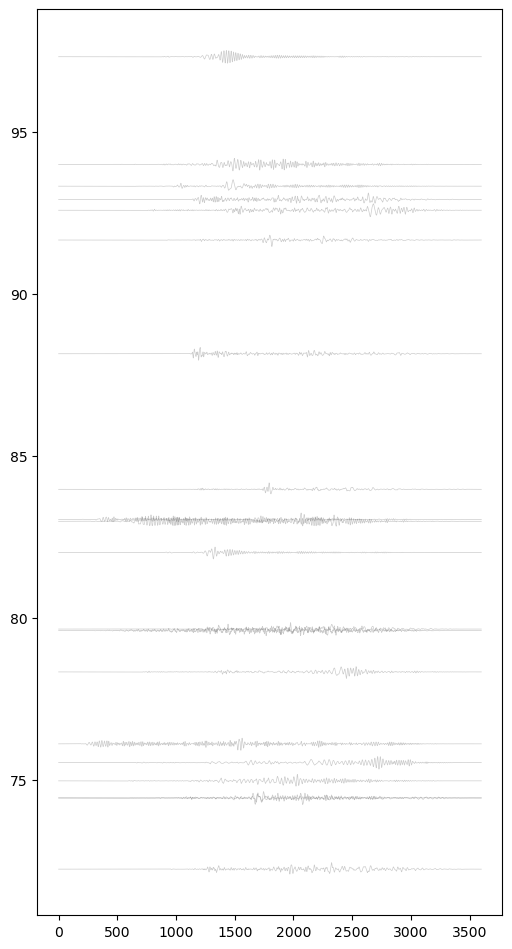

In [186]:
waveform_directory = 'Files/Tohoku2011/waveforms/'
station_directory = 'Files/Tohoku2011/stations/'

MSEED_files = os.listdir(waveform_directory)
XML_files = os.listdir(station_directory)

model = TauPyModel(model="prem")

plt.figure(figsize=[6,12], dpi=100)
for ii in range(len(MSEED_files)):    
    # read the waveform
    st = read(waveform_directory + MSEED_files[ii])
    tr = st[0]
    
    # Filtering with a lowpass on a copy of the original Trace
    tr_filt = tr.copy()
    tr_filt.detrend()
    tr_filt.taper(max_percentage=0.5)
    tr_filt.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=2, zerophase=True)
    
    # read the station metadata
    inv = read_inventory(station_directory + XML_files[ii])
    
    # station location
    stlo = inv[0][0].longitude
    stla = inv[0][0].latitude
    
    # Tohoku 2011 Earthquake location
    evlo = 143.05
    evla = 37.52
    
    # distance in degrees assuming great circle path
    d = locations2degrees(evla, evlo, stla, stlo)
    
    if (d < 70) or (d > 100):
        continue
    
    # calculate travel time and scale to first arrival
    arrivals = model.get_travel_times(source_depth_in_km=20.0,
                                      distance_in_degree=d,
                                      phase_list=["P", "PP", "pP", "PKP", "PKIKP"])
    travel_time = arrivals[0].time
    
    # find the scale
    t_begin = 0
    t_end = 100000#travel_time * 1.5
    t = tr_filt.times()
    x = tr_filt.data
    x_scale = np.max(np.abs(x[(t >= t_begin) & (t < t_end)])) * 5
    #x = x / (1 + np.exp((t-t_end)/10))
    
    # plot the trace
    plt.plot(t, d + x / x_scale, 
             color='k', linewidth=0.5, alpha=0.2)

plt.show()